In [1]:
import tensorflow
import keras
from keras import layers
from keras.models import Sequential
from keras.utils import image_dataset_from_directory
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
TRAINSIZE = 421*36
TESTSIZE = 151*36

In [3]:
xtrain = image_dataset_from_directory('data/train', labels=None, label_mode=None, color_mode='grayscale', batch_size=TRAINSIZE)
xtest = image_dataset_from_directory('data/test', labels=None, label_mode=None, color_mode='grayscale', batch_size=TESTSIZE)

Found 15156 files.
Found 5436 files.


In [4]:
xtrain = np.asarray(tuple(xtrain))
xtrain = xtrain.astype('float32')/255
xtrain = xtrain[0]
xtest = np.asarray(tuple(xtest))
xtest = xtest.astype('float32')/255
xtest = xtest[0]
print(xtrain.shape, xtest.shape)

(15156, 256, 256, 1) (5436, 256, 256, 1)


In [5]:
noise = 0.5
xtrain_noisy = xtrain + noise + np.random.normal(loc = 0, scale = 1, size = xtrain.shape)
xtrain_noisy = np.clip(xtrain_noisy, 0., 1)
xtest_noisy = xtest + noise + np.random.normal(loc=0, scale=1, size = xtest.shape)
xtest_noisy = np.clip(xtest_noisy, 0., 1)

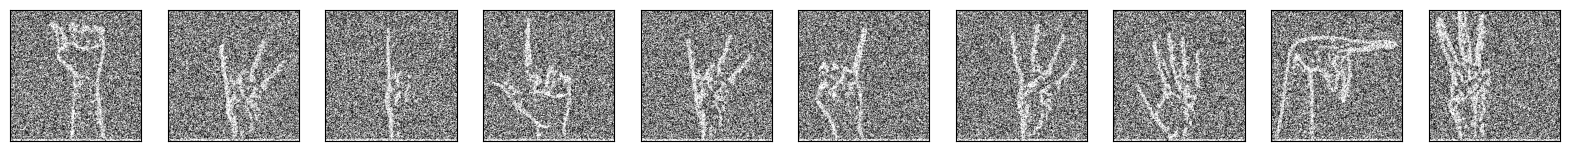

In [6]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtrain_noisy[i].reshape(256, 256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

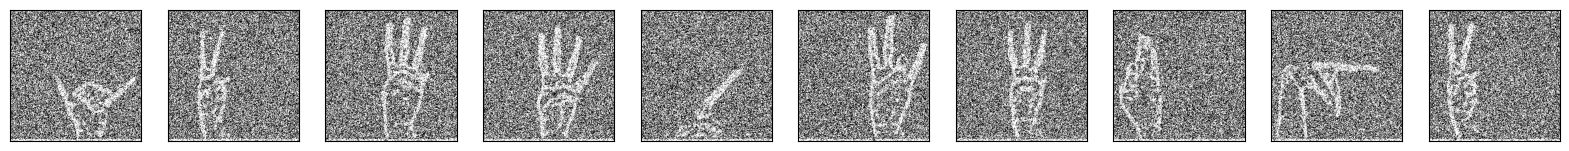

In [7]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtest_noisy[i].reshape(256, 256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
imginput = keras.Input(shape = (256, 256, 1))
x = layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(imginput)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
#end of convolution layers
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
#end of upsampling
autoencoder = keras.Model(imginput, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
autoencoder.fit(xtrain_noisy, xtrain,
                epochs = 100,
                batch_size=64,
                shuffle=True,
                validation_data=(xtest_noisy, xtest))

Epoch 1/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - loss: 0.2467 - val_loss: 0.0689
Epoch 2/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - loss: 0.0717 - val_loss: 0.0650
Epoch 3/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - loss: 0.0685 - val_loss: 0.0636
Epoch 4/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - loss: 0.0673 - val_loss: 0.0639
Epoch 5/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - loss: 0.0660 - val_loss: 0.0618
Epoch 6/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - loss: 0.0653 - val_loss: 0.0614
Epoch 7/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - loss: 0.0645 - val_loss: 0.0606
Epoch 8/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - loss: 0.0639 - val_loss: 0.0602
Epoch 9/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - loss: 0.0638 - val_loss: 0.0599
Epoch 10/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - loss: 0.0635 - val_loss: 0.0596
Epoch 11/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - loss: 0.0633 - val_loss: 0.0595
Epoch 12/100
237/237 ━━━━━━━━━

In [17]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 1)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)      │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)      │      9,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)        │      9,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 128, 128, 32)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)      │      9,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 256, 256, 32)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 1)       │        289 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 85,061 (332.27 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56,708 (221.52 KB)

In [24]:
aejson = autoencoder.to_json()
with open('models/autoencoder_model.json', "w") as jsdump:
    jsdump.write(aejson)
    print("Successful Model Save")
    autoencoder.save_weights('autoencoder.weights.h5')
    print("Weights successfully saved")

Successful Model Save
Weights successfully saved
